In [1]:
!pip install pandas scikit-learn streamlit


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('earthquake_data_tsunami.csv')
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [5]:
data.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [6]:
data.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [7]:
data['tsunami'].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

In [8]:
data.isnull().mean()*100

magnitude    0.0
cdi          0.0
mmi          0.0
sig          0.0
nst          0.0
dmin         0.0
gap          0.0
depth        0.0
latitude     0.0
longitude    0.0
Year         0.0
Month        0.0
tsunami      0.0
dtype: float64

In [9]:
data.shape

(782, 13)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(782, 13)

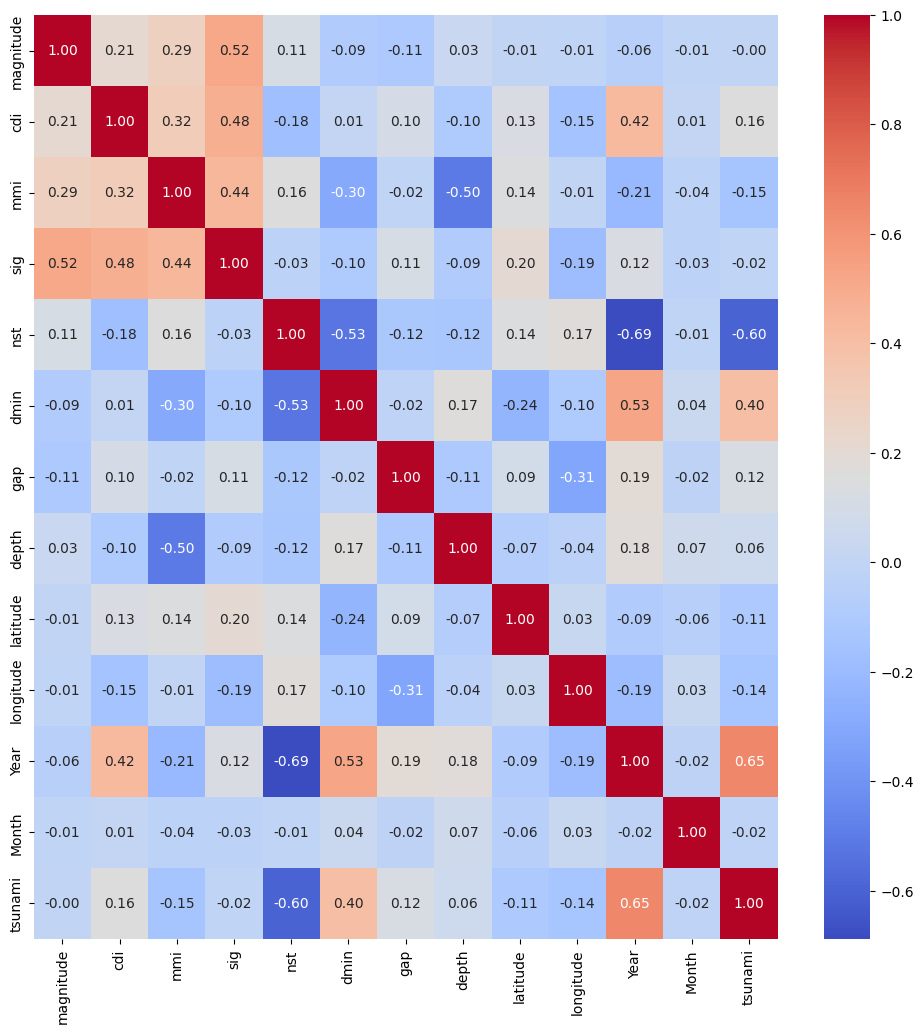

In [12]:
corr=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, fmt='.2f', annot=True, cmap='coolwarm')
plt.show()

In [13]:
data=data.drop('Year',axis=1)

In [14]:
tar_corr_var=data.corr()['tsunami']
top_features=tar_corr_var.abs().sort_values(ascending=False).head(8)
top_features

tsunami      1.000000
nst          0.600231
dmin         0.400752
cdi          0.160266
mmi          0.147363
longitude    0.136778
gap          0.116360
latitude     0.113209
Name: tsunami, dtype: float64

C:\Users\91739\AppData\Local\Temp\ipykernel_16988\4130447536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_features.index, x=top_features.values, palette='coolwarm')


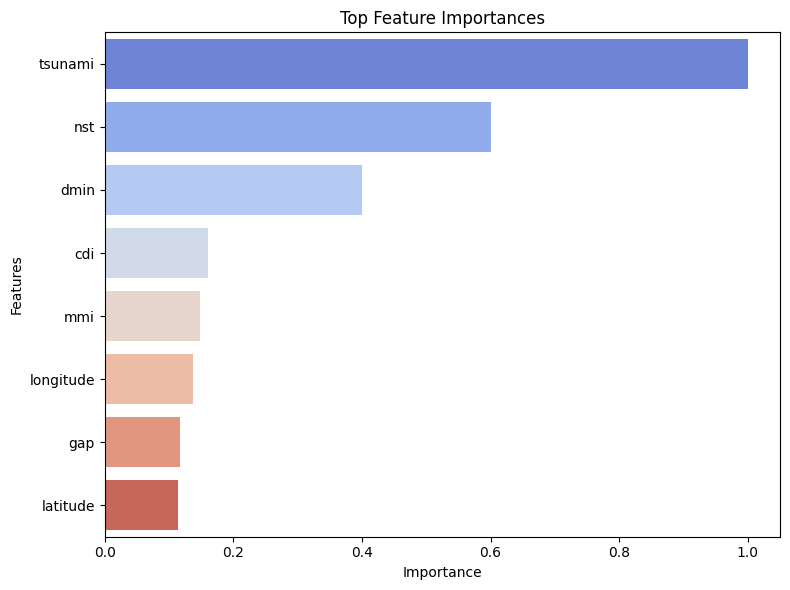

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(y=top_features.index, x=top_features.values, palette='coolwarm')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()

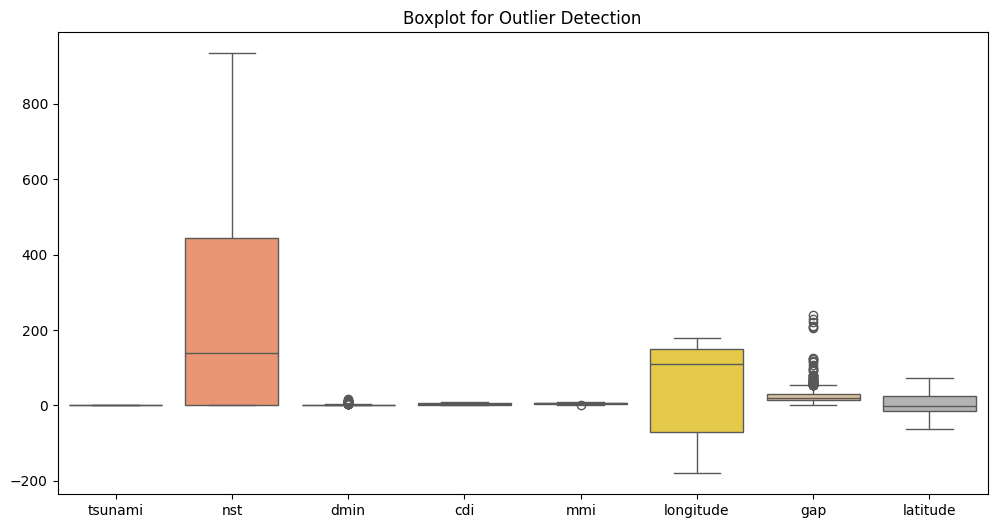

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']], palette='Set2')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [17]:
data[top_features.index].columns

Index(['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude'], dtype='object')

In [18]:
features=['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
!pip install imblearn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [22]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(contamination=0.1,random_state=42)
data['anomaly'] = iso.fit_predict(data[features])

print(data['anomaly'].value_counts())
data_clean = data[data['anomaly'] == 1].drop(columns='anomaly')

anomaly
 1    703
-1     79
Name: count, dtype: int64


In [23]:
data_clean = data[data['anomaly'] == 1].drop(columns='anomaly')

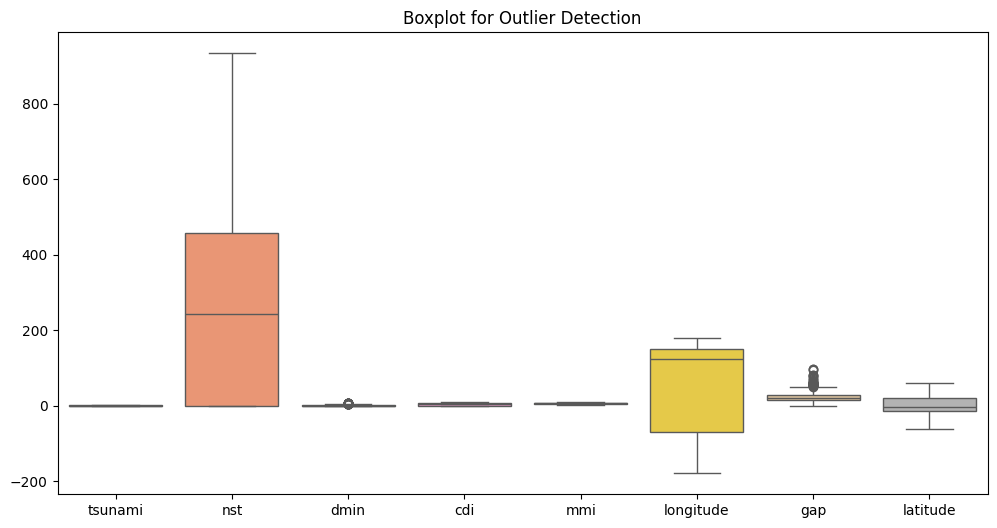

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean[['tsunami', 'nst', 'dmin', 'cdi', 'mmi', 'longitude', 'gap', 'latitude']], palette='Set2')
plt.title("Boxplot for Outlier Detection")
plt.show()

In [25]:
print(data.shape)
print(data_clean.shape)


(782, 13)
(703, 12)


In [26]:
x=data_clean.drop('tsunami',axis=1)
y=data_clean['tsunami']

In [27]:
sc=StandardScaler()
data_final=sc.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
smote=SMOTE(random_state=42)
x_train_bal,y_train_bal=smote.fit_resample(x_train,y_train)

In [30]:
print(y_train.value_counts())
print(y_train_bal.value_counts())

tsunami
0    359
1    203
Name: count, dtype: int64
tsunami
0    359
1    359
Name: count, dtype: int64


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [32]:
lg_model=LogisticRegression()
lg_model.fit(x_train_bal,y_train_bal)
y_pred=lg_model.predict(x_test)

c:\Users\91739\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        86
           1       0.71      0.87      0.78        55

    accuracy                           0.81       141
   macro avg       0.80      0.82      0.81       141
weighted avg       0.83      0.81      0.81       141



In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model_rf=RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(x_train_bal,y_train_bal)
y_pred_rf=model_rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        86
           1       0.83      0.91      0.87        55

    accuracy                           0.89       141
   macro avg       0.89      0.90      0.89       141
weighted avg       0.90      0.89      0.89       141



In [36]:
from xgboost import XGBClassifier

In [37]:
model_xg=XGBClassifier()
model_xg.fit(x_train_bal,y_train_bal)
y_pred_xg=model_xg.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        86
           1       0.82      0.89      0.85        55

    accuracy                           0.88       141
   macro avg       0.87      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141



In [39]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(x_train_bal, y_train_bal)
y_pred = svm.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        86
           1       0.71      0.93      0.80        55

    accuracy                           0.82       141
   macro avg       0.83      0.84      0.82       141
weighted avg       0.85      0.82      0.82       141



In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')

# Fit GridSearchCV to the balanced training data
grid_search.fit(x_train_bal, y_train_bal)

# Print the best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_rf_tuned = best_rf_model.predict(x_test)

# Print the classification report for the tuned model
print(classification_report(y_test, y_pred_rf_tuned))

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        86
           1       0.84      0.93      0.88        55

    accuracy                           0.90       141
   macro avg       0.89      0.91      0.90       141
weighted avg       0.91      0.90      0.90       141



In [42]:
import pickle

with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load trained model
with open('best_rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

st.set_page_config(page_title=" Tsunami Prediction App", layout="centered")
st.title('Tsunami Prediction App')
st.write('This app predicts the likelihood of a tsunami based on earthquake parameters.')

# User Inputs
st.subheader("Enter Earthquake Parameters")

magnitude = st.number_input('Magnitude', min_value=0.0, max_value=10.0, value=7.0, step=0.1)
cdi = st.number_input('CDI', min_value=0.0, max_value=10.0, value=5.0, step=0.1)
mmi = st.number_input('MMI', min_value=0.0, max_value=10.0, value=5.0, step=0.1)
sig = st.number_input('Significance (Sig)', min_value=0, max_value=3000, value=800, step=10)
nst = st.number_input('NST', min_value=0, max_value=1000, value=200, step=10)
dmin = st.number_input('Dmin', min_value=0.0, max_value=20.0, value=1.0, step=0.1)
gap = st.number_input('Gap', min_value=0.0, max_value=300.0, value=25.0, step=1.0)
depth = st.number_input('Depth', min_value=0.0, max_value=700.0, value=70.0, step=1.0)
latitude = st.number_input('Latitude', min_value=-90.0, max_value=90.0, value=0.0, step=0.1)
longitude = st.number_input('Longitude', min_value=-180.0, max_value=180.0, value=0.0, step=0.1)
month = st.number_input('Month', min_value=1, max_value=12, value=6, step=1)

# Create input DataFrame
input_data = pd.DataFrame({
    'magnitude': [magnitude],
    'cdi': [cdi],
    'mmi': [mmi],
    'sig': [sig],
    'nst': [nst],
    'dmin': [dmin],
    'gap': [gap],
    'depth': [depth],
    'latitude': [latitude],
    'longitude': [longitude],
    'Month': [month]
})

# Align columns with model (in case of order differences)
input_data = input_data.reindex(columns=model.feature_names_in_, fill_value=0)

# Predict button
if st.button('Predict Tsunami'):
    prediction = model.predict(input_data)

    if prediction[0] == 1:
        st.success(' **Prediction: Tsunami likely!** ⚠️')
    else:
        st.info('**Prediction: No tsunami likely.**')


Overwriting app.py
